In [1]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


# 2. Exploratory Data Analysis

Brokendown by year of sale


In [2]:
car_sales = pd.read_csv("dataset/gcar_data.csv")
# list columns
car_sales.columns


Index(['Unnamed: 0', 'brand', 'model', 'color', 'registration_date', 'year',
       'price_in_euro', 'power_kw', 'power_ps', 'transmission_type',
       'fuel_type', 'fuel_consumption_l_100km', 'fuel_consumption_g_km',
       'mileage_in_km', 'offer_description'],
      dtype='object')

In [3]:
car_sales.head()


,Unnamed: 0,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
0,75721,ford,Ford Kuga,black,05/2023,2023,38490,140,190,Automatic,Hybrid,"5,4 l/100 km",124 g/km,100.0,ST-Line Hybrid Adapt.LED+Head-Up-Display Klima
1,80184,hyundai,Hyundai i10,black,09/2018,2018,11555,49,67,Manual,Petrol,"4,6 l/100 km",106 g/km,27782.0,"blue Trend,Viele Extras,Top-Zustand"
2,19864,audi,Audi Q4 e-tron,grey,05/2021,2021,48886,125,170,Automatic,Electric,NaN,0 g/km,4247.0,35 e-tron S line/Matrix/Pano/ACC/SONOS/LM 21
3,76699,honda,Honda CR-V,red,07/2018,2018,24490,114,155,Automatic,Petrol,"7,5 l/100 km",175 g/km,57000.0,2.0 Lifestyle Plus Automatik Navi FAP
4,92991,kia,Kia Sportage,black,02/2023,2023,34990,110,150,Manual,Petrol,"5,9 l/100 km",150 g/km,7500.0,"1.6 T 48V 2WD Spirit LED, WR"


In [4]:
# clean column names
car_sales.columns = car_sales.columns.str.lower().str.replace(" ", "_")
car_sales.columns

Index(['unnamed:_0', 'brand', 'model', 'color', 'registration_date', 'year',
       'price_in_euro', 'power_kw', 'power_ps', 'transmission_type',
       'fuel_type', 'fuel_consumption_l_100km', 'fuel_consumption_g_km',
       'mileage_in_km', 'offer_description'],
      dtype='object')

In [5]:
# remove unnecessary columns ('unnamed:_0' and offer_description)
car_sales = car_sales.drop(columns=['unnamed:_0', 'offer_description'])
car_sales.head(5)

,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km
0,ford,Ford Kuga,black,05/2023,2023,38490,140,190,Automatic,Hybrid,"5,4 l/100 km",124 g/km,100.0
1,hyundai,Hyundai i10,black,09/2018,2018,11555,49,67,Manual,Petrol,"4,6 l/100 km",106 g/km,27782.0
2,audi,Audi Q4 e-tron,grey,05/2021,2021,48886,125,170,Automatic,Electric,NaN,0 g/km,4247.0
3,honda,Honda CR-V,red,07/2018,2018,24490,114,155,Automatic,Petrol,"7,5 l/100 km",175 g/km,57000.0
4,kia,Kia Sportage,black,02/2023,2023,34990,110,150,Manual,Petrol,"5,9 l/100 km",150 g/km,7500.0


In [6]:
miss_value=car_sales[pd.isnull(car_sales['fuel_consumption_l_100km'])]
miss_value['fuel_type'].value_counts()


fuel_type
Petrol           4920
Diesel           2986
Electric         2266
Hybrid            761
LPG               164
Unknown            45
Other              41
Hydrogen           24
Diesel Hybrid      14
CNG                13
Ethanol             5
Name: count, dtype: int64

In [7]:
# fill missing values in 'fuel_consumption_l_100km' with '0'
condition=pd.isnull(car_sales['fuel_consumption_l_100km'])
car_sales.loc[condition,'fuel_consumption_l_100km']=str('0')



car_sales.dropna(inplace=True)



drop_indices = []

# Filter for '-' in either column
drop_indices.extend(car_sales.loc[car_sales['fuel_consumption_l_100km'].str.contains('-')].index)
drop_indices.extend(car_sales.loc[car_sales['fuel_consumption_g_km'].str.contains('-')].index)

drop_indices.extend(car_sales.loc[car_sales['fuel_consumption_l_100km'].str.contains('Diesel')].index)
drop_indices.extend(car_sales.loc[car_sales['fuel_consumption_g_km'].str.contains('Petrol')].index)
car_sales.drop(index=set(drop_indices), inplace=True)


car_sales['fuel_consumption_l_100km']=(car_sales['fuel_consumption_l_100km'].str.split(' ').str[0].str.replace(',','.')).astype(float)
car_sales['fuel_consumption_g_km']=(car_sales['fuel_consumption_g_km'].str.split(' ').str[0].str.replace(',','.')).astype(float)

car_sales


,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km
0,ford,Ford Kuga,black,05/2023,2023,38490,140,190,Automatic,Hybrid,5.4,124.0,100.0
1,hyundai,Hyundai i10,black,09/2018,2018,11555,49,67,Manual,Petrol,4.6,106.0,27782.0
2,audi,Audi Q4 e-tron,grey,05/2021,2021,48886,125,170,Automatic,Electric,0.0,0.0,4247.0
3,honda,Honda CR-V,red,07/2018,2018,24490,114,155,Automatic,Petrol,7.5,175.0,57000.0
4,kia,Kia Sportage,black,02/2023,2023,34990,110,150,Manual,Petrol,5.9,150.0,7500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,audi,Audi A1,blue,05/2012,2012,12599,90,122,Manual,Petrol,5.3,126.0,148000.0
99996,fiat,Fiat 500,black,12/2019,2019,9999,51,69,Automatic,Petrol,5.2,120.0,31698.0
99997,honda,Honda CR-V,brown,01/2019,2019,24800,127,173,Manual,Petrol,6.3,143.0,77900.0
99998,alfa-romeo,Alfa Romeo Giulietta,grey,12/2020,2020,22990,125,170,Automatic,Diesel,5.5,145.0,52251.0


In [8]:
# Convert 'power_kw' and 'power_ps' to numeric values

for col in ['power_kw', 'power_ps']:
    # Remove any non-numeric characters and convert to float
    car_sales[col] = car_sales[col].apply(lambda x: float(x.split()[0].replace(',', '.')))

car_sales

,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km
0,ford,Ford Kuga,black,05/2023,2023,38490,140.0,190.0,Automatic,Hybrid,5.4,124.0,100.0
1,hyundai,Hyundai i10,black,09/2018,2018,11555,49.0,67.0,Manual,Petrol,4.6,106.0,27782.0
2,audi,Audi Q4 e-tron,grey,05/2021,2021,48886,125.0,170.0,Automatic,Electric,0.0,0.0,4247.0
3,honda,Honda CR-V,red,07/2018,2018,24490,114.0,155.0,Automatic,Petrol,7.5,175.0,57000.0
4,kia,Kia Sportage,black,02/2023,2023,34990,110.0,150.0,Manual,Petrol,5.9,150.0,7500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,audi,Audi A1,blue,05/2012,2012,12599,90.0,122.0,Manual,Petrol,5.3,126.0,148000.0
99996,fiat,Fiat 500,black,12/2019,2019,9999,51.0,69.0,Automatic,Petrol,5.2,120.0,31698.0
99997,honda,Honda CR-V,brown,01/2019,2019,24800,127.0,173.0,Manual,Petrol,6.3,143.0,77900.0
99998,alfa-romeo,Alfa Romeo Giulietta,grey,12/2020,2020,22990,125.0,170.0,Automatic,Diesel,5.5,145.0,52251.0


In [9]:
def cannot_convert_to_float(value):
    try:
        float(value)
        return False
    except (ValueError, TypeError):
        return True



In [10]:
condition = car_sales[car_sales['price_in_euro'].apply(cannot_convert_to_float)].index
car_sales.drop(index=condition,inplace=True)

condition = car_sales[car_sales['year'].apply(cannot_convert_to_float)].index
car_sales.drop(index=condition,inplace=True)



car_sales['price_in_euro']=car_sales['price_in_euro'].astype(float)
car_sales['year']=car_sales['year'].astype(int)



In [11]:
car_sales.describe()

,year,price_in_euro,power_kw,power_ps,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km
count,83513.000000,8.351300e+04,83513.000000,83513.000000,83513.000000,83513.000000,8.351300e+04
mean,2016.920300,2.958110e+04,138.291452,188.101517,6.639755,148.152647,7.928011e+04
std,4.917162,4.616251e+04,80.669131,109.659161,19.496563,66.036379,7.542339e+04
min,1995.000000,2.500000e+02,5.000000,7.000000,0.000000,0.000000,0.000000e+00
25%,2014.000000,1.350000e+04,88.000000,120.000000,4.800000,119.000000,2.175000e+04
50%,2018.000000,2.099000e+04,110.000000,150.000000,5.700000,139.000000,6.250000e+04
75%,2020.000000,3.299000e+04,155.000000,211.000000,6.800000,170.000000,1.179000e+05
max,2023.000000,5.890500e+06,735.000000,999.000000,739.000000,999.000000,3.800000e+06


In [12]:
# explore the number of unique values in each non-numeric column
for col in car_sales.select_dtypes(include=['object']).columns:
    print(f"{col}: {car_sales[col].nunique()} unique values")

brand: 29 unique values
model: 552 unique values
color: 14 unique values
registration_date: 333 unique values
transmission_type: 4 unique values
fuel_type: 10 unique values


In [13]:
# # Convert registration_date to datetime format
# year['registration_date'] = pd.to_datetime(car_sales['registration_date'], format='%m/%Y', errors='coerce')

# # Extract the year
# car_sales['registration_year'] = car_sales['registration_date'].dt.year

# # Show descriptive statistics
# print("Registration Date Description:")
# print(car_sales['registration_date'].describe())

# print("\nRegistration Year Description:")
# print(car_sales['registration_year'].describe())

# # difference between year and registration_year
# car_sales['year_diff'] = car_sales['year'] - car_sales['registration_year']
# # Show descriptive statistics for year_diff
# print("\nYear Difference Description:")
# print(car_sales['year_diff'].describe())


In [14]:
car_sales['registration_date']=car_sales['registration_date'].str.split('/').str[0].astype(int)
car_sales=car_sales.rename(columns={'registration_date':'month'})

In [15]:
car_sales.duplicated().sum()

np.int64(2882)

In [16]:
car_sales.drop_duplicates(inplace=True)

In [17]:
# slice by years
car_sales_years = [
    car_sales[car_sales['year'] == year]
    for year in car_sales['year'].unique()
]

## Convert non numeric columns to numerice for use with models

In [18]:
# these columns are non numeric and the encoding method
# 1 brand, one-hot encoding
# 2 fuel_type, one-hot encoding
# 3 transmission_type, one-hot encoding 
# 4 color, one-hot encoding
# 5 model, target/mean encoding

def one_hot_encode(df, column):
    """
    One-hot encode a specified column in the DataFrame.
    
    Parameters:
    df (DataFrame): The DataFrame to modify.
    column (str): The column to one-hot encode.
    
    Returns:
    DataFrame: The modified DataFrame with the one-hot encoded column.
    """
    return pd.get_dummies(df, columns=[column], prefix=column, drop_first=True)


car_sales_processed = car_sales.copy()
# apply one-hot encoding to 'brand', 'fuel_type', 'transmission_type', and 'color'
car_sales_processed = one_hot_encode(car_sales_processed, 'brand')
car_sales_processed = one_hot_encode(car_sales_processed, 'fuel_type')
car_sales_processed = one_hot_encode(car_sales_processed, 'transmission_type')
car_sales_processed = one_hot_encode(car_sales_processed, 'color')
car_sales_processed.drop(columns=['model'], inplace=True)
car_sales_processed.head()

,month,year,price_in_euro,power_kw,power_ps,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,brand_aston-martin,brand_audi,...,color_brown,color_gold,color_green,color_grey,color_orange,color_red,color_silver,color_violet,color_white,color_yellow
0,5,2023,38490.0,140.0,190.0,5.4,124.0,100.0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,9,2018,11555.0,49.0,67.0,4.6,106.0,27782.0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,5,2021,48886.0,125.0,170.0,0.0,0.0,4247.0,False,True,...,False,False,False,True,False,False,False,False,False,False
3,7,2018,24490.0,114.0,155.0,7.5,175.0,57000.0,False,False,...,False,False,False,False,False,True,False,False,False,False
4,2,2023,34990.0,110.0,150.0,5.9,150.0,7500.0,False,False,...,False,False,False,False,False,False,False,False,False,False


In [19]:
# save as processed data
car_sales_processed.to_csv("dataset/processed_car_sales.csv", index=False)

## Charts

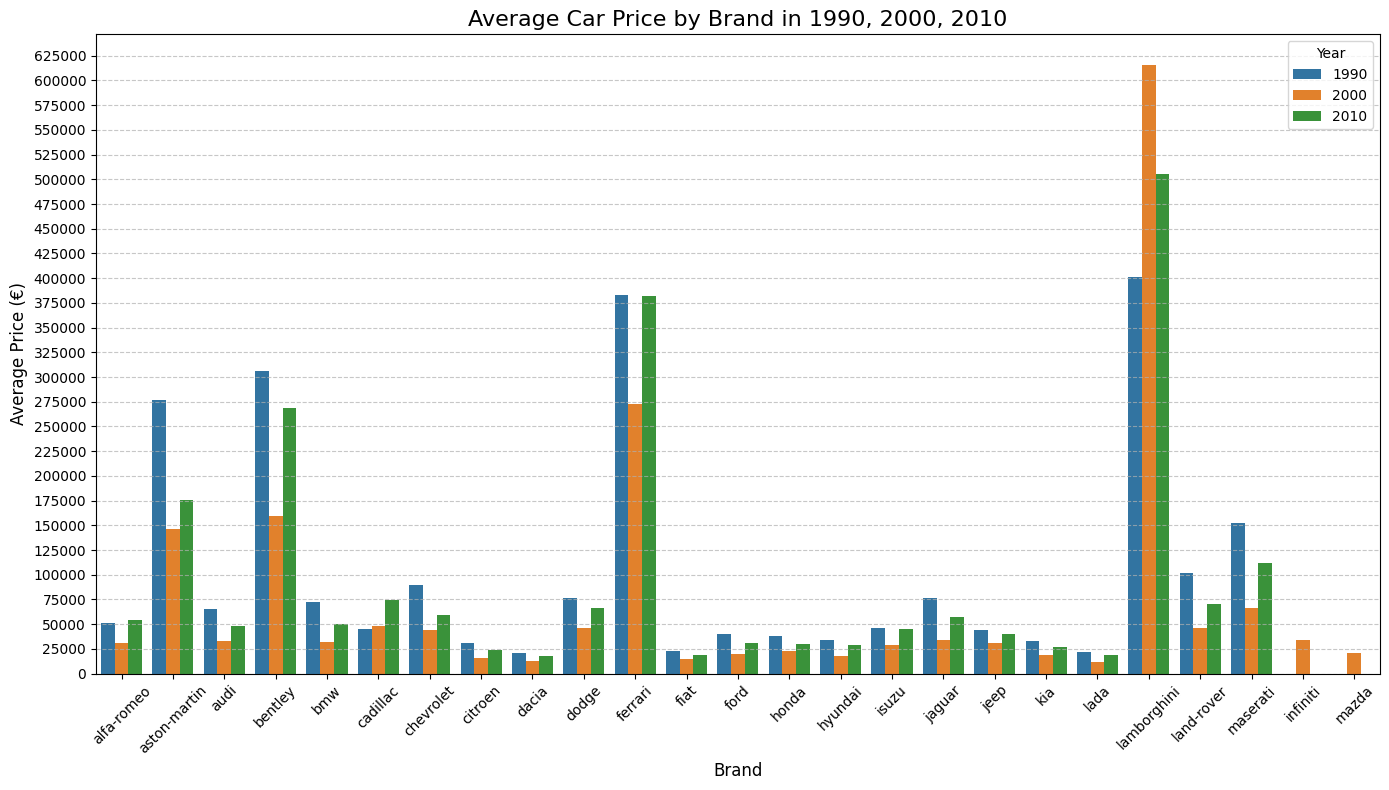

In [20]:

# Combine all year-wise grouped data into a single DataFrame
avg_price_df = pd.concat([
    df.groupby('brand')['price_in_euro'].mean().reset_index().assign(year=year)
    for df, year in zip(car_sales_years, [1990, 2000, 2010])
])

# Optional: filter to top N brands by frequency across all years
top_brands = avg_price_df['brand'].value_counts().head(100).index
avg_price_df = avg_price_df[avg_price_df['brand'].isin(top_brands)]

# Plot using seaborn
plt.figure(figsize=(14, 8))
sns.barplot(
    data=avg_price_df,
    x='brand',
    y='price_in_euro',
    hue='year',
    palette='tab10'
)

plt.title('Average Car Price by Brand in 1990, 2000, 2010', fontsize=16)
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Average Price (€)', fontsize=12)
max_price = avg_price_df['price_in_euro'].max()
step =25000  # Set spacing between ticks
plt.yticks(np.arange(0, max_price + step, step))
plt.xticks(rotation=45)
plt.legend(title='Year')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# 3. ML Model

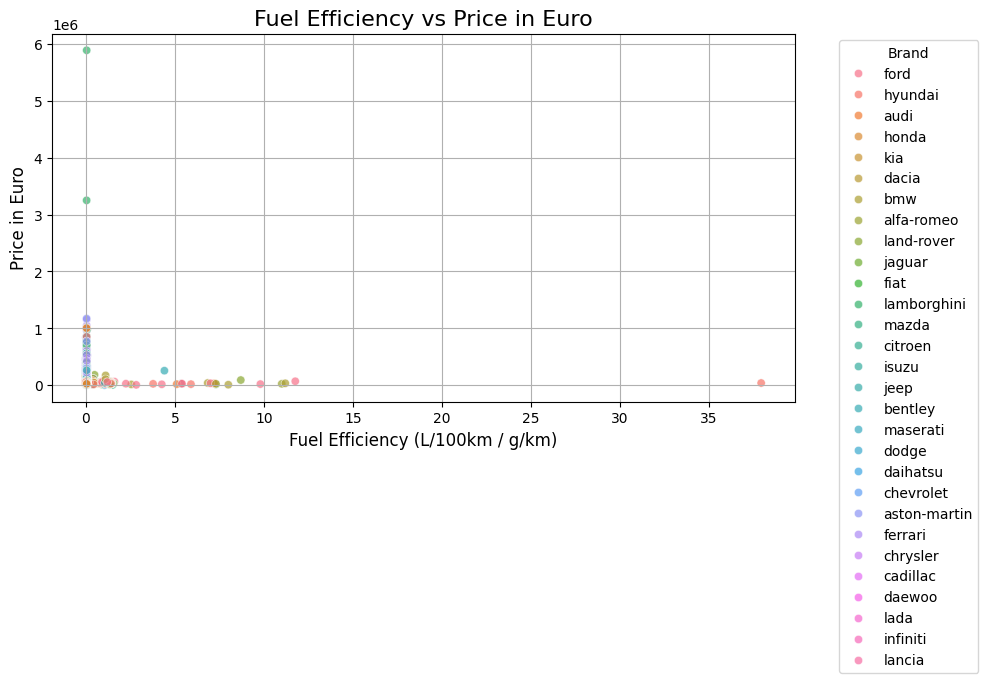

In [21]:
# feature extraction
car_sales['price_per_kw'] = car_sales['price_in_euro'] / car_sales['power_kw']
car_sales['price_per_ps'] = car_sales['price_in_euro'] / car_sales['power_ps']
car_sales['fuel_efficiency'] = car_sales['fuel_consumption_l_100km'] / car_sales['fuel_consumption_g_km']
# plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=car_sales,
    x='fuel_efficiency',
    y='price_in_euro',
    hue='brand',
    alpha=0.7
)
plt.title('Fuel Efficiency vs Price in Euro', fontsize=16)
plt.xlabel('Fuel Efficiency (L/100km / g/km)', fontsize=12)
plt.ylabel('Price in Euro', fontsize=12)
plt.legend(title='Brand', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()      


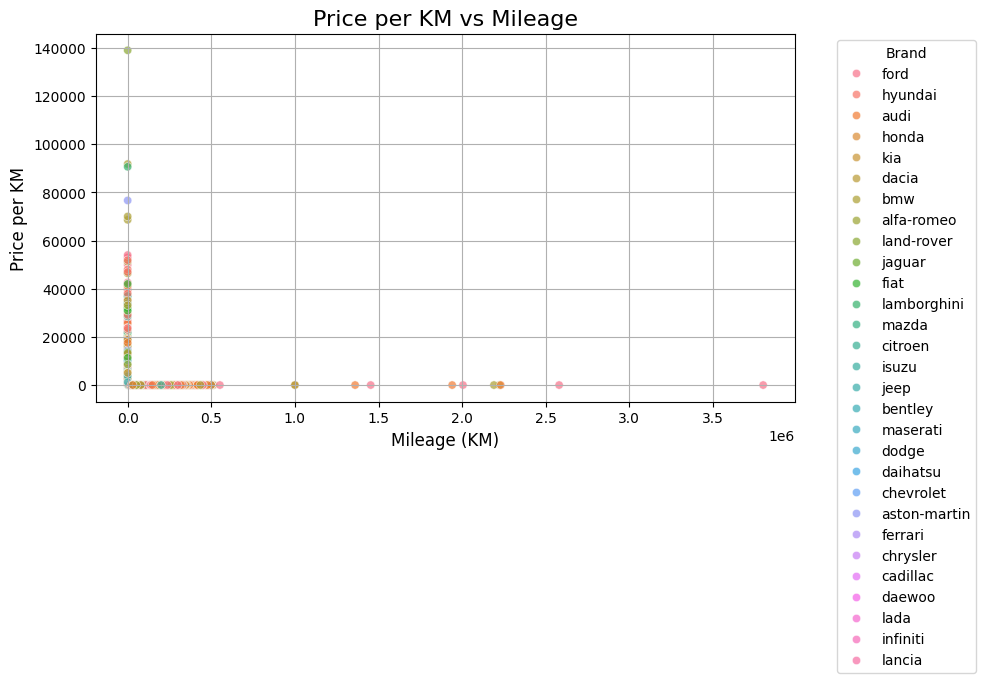

In [22]:
# price per km
car_sales['price_per_km'] = car_sales['price_in_euro'] / car_sales['mileage_in_km']
# plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=car_sales,
    x='mileage_in_km',
    y='price_per_km',
    hue='brand',
    alpha=0.7
)
plt.title('Price per KM vs Mileage', fontsize=16)
plt.xlabel('Mileage (KM)', fontsize=12)
plt.ylabel('Price per KM', fontsize=12)
plt.legend(title='Brand', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [23]:
car_sales_years_processed = [
    car_sales_processed[car_sales_processed['year'] == year]
    for year in car_sales_processed['year'].unique()
]
print(car_sales_years_processed[0]['year'].head(4))


print(car_sales_years_processed[-1]['year'].head(4))

len(car_sales_years_processed)

0     2023
4     2023
6     2023
28    2023
Name: year, dtype: int64
22212    1995
25474    1995
29668    1995
50195    1995
Name: year, dtype: int64


29

## New Batch of data processing

In [ ]:
# remove 2023 from the processed data, in a new data frame, take the un processed data from 2023, build a pipeline to convert the data to show how new data can be processed
# datasets
car_sales_before_2023 = car_sales_processed[car_sales_processed['year'] < 2023]

# first, we read in the csv and only take the data from 2023
car_sales_2023 = pd.read_csv("dataset/gcar_data.csv")
car_sales_2023 = car_sales_2023[car_sales_2023['year'] == '2023']

# convert the data to show how new data can be processed, make a class that has the methods to process the data

# class with methods to process the data
class CarSalesProcessor: 
    def __init__(self, df, columns):
        self.df = df.copy()
        # set of all columns that should have values
        self.columns = columns

    def clean_column_names(self):
        self.df.columns = self.df.columns.str.lower().str.replace(" ", "_")
        # print(self.df)

    def drop_unnecessary_columns(self):
        self.df = self.df.drop(columns=['unnamed:_0', 'offer_description'], errors='ignore')
        # print(self.df)

    def convert_columns(self):
        condition=pd.isnull(self.df['fuel_consumption_l_100km'])
        self.df.loc[condition,'fuel_consumption_l_100km']=str('0')
        self.df.dropna(inplace=True)

        drop_indices = []

        # Filter for '-' in either column
        drop_indices.extend(self.df.loc[self.df['fuel_consumption_l_100km'].str.contains('-')].index)
        drop_indices.extend(self.df.loc[self.df['fuel_consumption_g_km'].str.contains('-')].index)

        drop_indices.extend(self.df.loc[self.df['fuel_consumption_l_100km'].str.contains('Diesel')].index)
        drop_indices.extend(self.df.loc[self.df['fuel_consumption_g_km'].str.contains('Petrol')].index)
        self.df.drop(index=set(drop_indices), inplace=True)

        self.df['fuel_consumption_l_100km']=(self.df['fuel_consumption_l_100km'].str.split(' ').str[0].str.replace(',','.')).astype(float)
        self.df['fuel_consumption_g_km']=(self.df['fuel_consumption_g_km'].str.split(' ').str[0].str.replace(',','.')).astype(float)
        # print(self.df)

    def convert_power_columns(self):
        for col in ['power_kw', 'power_ps']:
            # Remove any non-numeric characters and convert to float
            self.df[col] = self.df[col].apply(lambda x: float(x.split()[0].replace(',', '.')))

    def remove_invalid_entries(self):
        def cannot_convert_to_float(value):
            try:
                float(value)
                return False
            except (ValueError, TypeError):
                return True

        condition = self.df[self.df['price_in_euro'].apply(cannot_convert_to_float)].index
        self.df.drop(index=condition, inplace=True)

        condition = self.df[self.df['year'].apply(cannot_convert_to_float)].index
        self.df.drop(index=condition, inplace=True)

        self.df['price_in_euro'] = self.df['price_in_euro'].astype(float)
        self.df['year'] = self.df['year'].astype(int)

    def reg_to_month(self):
        # Convert 'registration_date' to month
        self.df['registration_date'] = self.df['registration_date'].str.split('/').str[0].astype(int)
        self.df = self.df.rename(columns={'registration_date': 'month'})

    def remove_duplicates(self):
        # drop duplicates
        self.df.drop_duplicates(inplace=True)

    def numeric_encoding(self):
        # encode categorical columns using one-hot encoding
        def one_hot_encode(df, column):
            """
            One-hot encode a specified column in the DataFrame.
            
            Parameters:
            df (DataFrame): The DataFrame to modify.
            column (str): The column to one-hot encode.
            
            Returns:
            DataFrame: The modified DataFrame with the one-hot encoded column.
            """
            return pd.get_dummies(df, columns=[column], prefix=column, drop_first=True)

        # apply one-hot encoding to 'brand', 'fuel_type', 'transmission_type', and 'color'
        self.df = one_hot_encode(self.df, 'brand')
        self.df = one_hot_encode(self.df, 'fuel_type')
        self.df = one_hot_encode(self.df, 'transmission_type')
        self.df = one_hot_encode(self.df, 'color')

       

    def insert_new_columns(self):
        # if any columns are missing, add them with default values (0 for numeric, False for one-hot)
        for column in self.columns:
            if column not in self.df.columns:
                # Decide default value based on column name prefix (heuristic)
                if any(column.startswith(prefix) for prefix in ['brand_', 'fuel_type_', 'transmission_type_', 'color_']):
                    self.df[column] = False
                else:
                    self.df[column] = 0


    def process(self):
        self.clean_column_names()
        self.drop_unnecessary_columns()
        self.convert_columns()
        self.convert_power_columns()
        self.remove_invalid_entries()
        self.reg_to_month()
        self.remove_duplicates()
        self.numeric_encoding()
        self.insert_new_columns()

        return self.df


#run the class and assert eh output data is the same as the processed data
# print(car_sales_2023.head(4))
processor = CarSalesProcessor(car_sales_2023, car_sales_processed.columns)
car_sales_2023_processed = processor.process()
# assert the processed data is the same as the processed data
print(len(car_sales_processed[car_sales_processed['year'] == 2023].columns))
print(len(car_sales_2023_processed.columns))

# print diff
print(set(car_sales_processed[car_sales_processed['year'] == 2023].columns)- set(car_sales_2023_processed.columns))
print(set(car_sales_2023_processed.columns) - set(car_sales_processed[car_sales_processed['year'] == 2023].columns))

# print head of each
print(car_sales_processed[car_sales_processed['year'] == 2023].head(4))
print(car_sales_2023_processed.head(4))
car_sales_2023_processed = car_sales_2023_processed.reindex(columns=car_sales_processed[car_sales_processed['year'] == 2023].columns)

# save as csv
car_sales_2023_processed.to_csv("dataset/processed_car_sales_2023_new.csv", index=False)
# reindex the processed data to match the columns of the processed data
car_sales_processed = car_sales_processed[car_sales_processed['year'] == 2023].to_csv("dataset/processed_car_sales_2023.csv", index=False)

# print diff of dataframes from csv
p_csv_new = pd.read_csv("dataset/processed_car_sales_2023_new.csv")
p_csv_old = pd.read_csv("dataset/processed_car_sales_2023.csv")
print(p_csv_new.compare(p_csv_old))
assert p_csv_new.equals(p_csv_old)


61
62
set()
{'model'}
    month  year  price_in_euro  power_kw  power_ps  fuel_consumption_l_100km  \
0       5  2023        38490.0     140.0     190.0                       5.4   
4       2  2023        34990.0     110.0     150.0                       5.9   
6       1  2023        56390.0     130.0     177.0                       8.9   
28      3  2023        32950.0     118.0     160.0                       6.1   

    fuel_consumption_g_km  mileage_in_km  brand_aston-martin  brand_audi  ...  \
0                   124.0          100.0               False       False  ...   
4                   150.0         7500.0               False       False  ...   
6                   232.0          499.0               False       False  ...   
28                  139.0          500.0               False       False  ...   

    color_brown  color_gold  color_green  color_grey  color_orange  color_red  \
0         False       False        False       False         False      False   
4        

## Feature Sets

In [27]:
from sklearn.ensemble import RandomForestRegressor

# Define basic and extended feature sets
basic_features = [
    'month', 'year', 'power_kw', 'power_ps',
    'fuel_consumption_l_100km', 'fuel_consumption_g_km', 'mileage_in_km'
]

extended_features = basic_features + [
    col for col in car_sales_processed.columns
    if col.startswith(('brand_', 'fuel_type_', 'transmission_type_', 'color_'))
]
import mlflow
import mlflow.sklearn
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

def train_rf_model(X, y, name):
    # Split the dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize and train Random Forest
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Log with MLflow
    with mlflow.start_run(run_name=name):
        mlflow.log_param("model_type", "RandomForestRegressor")
        mlflow.log_param("features_used", name)
        mlflow.log_metric("rmse", rmse)
        mlflow.log_metric("r2_score", r2)
        mlflow.sklearn.log_model(model, "model")
        print(f"{name} → RMSE: {rmse:.2f} | R²: {r2:.3f}")

# Target column
target = car_sales_processed['price_in_euro']

# Train with basic features
X_basic = car_sales_processed[basic_features]
train_rf_model(X_basic, target, "RandomForest_Basic")

# Train with extended features
X_extended = car_sales_processed[extended_features]
train_rf_model(X_extended, target, "RandomForest_Extended")


2025/07/07 20:38:03 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/07/07 20:38:04 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


RandomForest_Basic → RMSE: 16960.50 | R²: 0.874


2025/07/07 20:38:06 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/07/07 20:38:08 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


RandomForest_Extended → RMSE: 15600.96 | R²: 0.893


## Train Model

In [25]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import mlflow
import mlflow.sklearn

# Load your data (replace with your preprocessed dataset)
# X, y should already be clean and numeric
# Example: X = car_sales_processed.drop(columns=['price_in_euro']), y = car_sales_processed['price_in_euro']
car_sales_processed = pd.read_csv("dataset/processed_car_sales_2023.csv")
X = car_sales_processed.drop(columns=['price_in_euro'])
y = car_sales_processed['price_in_euro']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Start MLflow experiment
mlflow.set_experiment("Car_Price_Random_Forest")

with mlflow.start_run():

    # Define and train model
    rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
    rf.fit(X_train, y_train)

    # Predict
    y_pred = rf.predict(X_test)

    # Evaluate
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Log parameters
    mlflow.log_param("n_estimators", 100)
    mlflow.log_param("max_depth", 10)

    # Log metrics
    mlflow.log_metric("rmse", rmse)
    mlflow.log_metric("r2", r2)

    # Log model
    mlflow.sklearn.log_model(rf, "random_forest_model", input_example=X_test.iloc[:1])

    print(f"Logged model and metrics to MLflow. RMSE: {rmse:.2f}, R²: {r2:.2f}")


2025/07/07 20:20:24 INFO mlflow.tracking.fluent: Experiment with name 'Car_Price_Random_Forest' does not exist. Creating a new experiment.
2025/07/07 20:20:26 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
/home/ethan/Documents/mlops-assignment/.venv/lib/python3.12/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for

Logged model and metrics to MLflow. RMSE: 15721.98, R²: 0.89
